# 1) Understand the difference between vertical tables and horizontal tables.

## Horizontal Tables
In the database world, tables are used to store data, so there are two different ways to structure these tables, among which are the Horizontal and Vertical structures. The horizontal structure, also called relational table, is generally  based on the partitioning of the data i.e. In a relational table, each row contains a group of common data fields, associated by a unique key. This kind of table is generally more used due to its easy of handling when compared to other structures of tables, This table format can efficiently hold a large quantity of unique values, which can be efficiently joined with other tables by associating unique keys. This is how the relational model works, and is the basis for this application's functionality..

## Vertical Tables
On the other hand, in a vertical table, each row contains one value for one data field for a unique key. This type of table is often used in situations where the data fields are not known at design time, or are very dynamic. An example of this is for user defined data, which allows an end user to add their own data fields. Since the data fields can be added at any time, their names are often stored as rows as shown above.
The main advantage of a vertical table is that data fields are defined in rows, not columns. Vertical tables are more predictable, since they can only grow vertically, not horizontally. The disadvantage is that they can grow exponentially larger, by rows, than relational tables. And to join them to other tables, they require a query-time transformation, which can be computationally expensive, so the kind of table that you'll use to work is highly dependent of the context of your goal, so it is recomended to check carefully what is the goal of your project? How dynamic is it? And based on these question use the kind of data structure that better fits on your project. In the classification studies of Xie et al. (2013) they have found that tables represented horizontally could robustly improve the performance of their classifier, so is recommended to carefully check your purpose before trying to reshape the table you're going to work.

## References

Xie, J; Xu, B; Chuang, Z. Horizontal and Vertical Ensemble with Deep Representation for
Classification. Presented at the ICML Workshop on Representation Learning, Atlanta, Georgia, USA, 2013.: https://arxiv.org/pdf/1306.2759.pdf


https://support.exagoinc.com/hc/en-us/articles/115000137913-Vertical-Table-Support


# 2) Find examples of vertical and horizontal tables

## About the data:

The data we're going to use in this exercise was scrapped from the site: "https://amazon.com" which is a platmform dedicated to sell a gigantic variety of products. Among the products comercialized in Amazon, we've choosen to work with the lis of mangás (japanese comics) found in the website. This dataset is structured in four columns which are: 

### Title
The title of the Mangá that we collected the data

### Price
The price of the mangá

### Rating
That is the rating of the mangá, if it has a good note in a scale from 0 to 5 stars

### URL
This is the URL of the product, where you can find to buy.

The code used to scrap the data may be found in the following link: https://github.com/Viniciusfcfranca/Web_Scrapping_Polifact/blob/main/Web%20Scrapping%20Amazon.ipynb

In [1]:
#Importing the necessary packages
import numpy as np
import pandas as pd
df = pd.read_csv("prices.csv")
df

,Title,Price,Rating,URL
0,Jujutsu Kaisen 0,$8.99,4.8 out of 5 stars,https://www.amazon.com/Jujutsu-Kaisen-0-Gege-A...
1,The Two Lions,$12.59,4.7 out of 5 stars,https://www.amazon.com/Two-Lions-Nagisa-Furuya...
2,"Kaiju No. 8, Vol. 1 (1)",$9.99,4.9 out of 5 stars,https://www.amazon.com/Kaiju-No-Vol-Naoya-Mats...
3,nichijou 15th anniversary box set,$82.78,4.9 out of 5 stars,https://www.amazon.com/nichijou-15th-anniversa...
4,Dragon Ball Complete Box Set: Vols. 1-16 with ...,$116.19,4.8 out of 5 stars,https://www.amazon.com/Dragon-Ball-Complete-Bo...
...,...,...,...,...
303,"Fist of the North Star, Vol. 1 (1)",$17.99,4.9 out of 5 stars,https://www.amazon.com/Fist-North-Star-Vol-1/d...
304,"One Piece, Vol. 98 (98)",$9.49,4.9 out of 5 stars,https://www.amazon.com/One-Piece-Vol-98/dp/197...
305,"I'm the Villainess, So I'm Taming the Final Bo...",$8.99,4.7 out of 5 stars,https://www.amazon.com/Villainess-Taming-Final...
306,FLCL Omnibus,$17.99,4.8 out of 5 stars,https://www.amazon.com/FLCL-Omnibus-Gainax/dp/...


In the context of this exercise, we'll work only with the columns title, price and rating so, we'll drop the other column, but before this, we'll clean the price column to it be classified as a numeric variable.

In [2]:
df['Price'] = df['Price'].map(lambda x: x.lstrip('$').rstrip('aAbBcC'))
df['Price']= df['Price'].astype(float) 

In [3]:
df['Rating']=df['Rating'].str.extract('([1-5]\.[0-9])')

In [4]:
df = df.drop(['URL'], 1)

In [5]:
df.head()

,Title,Price,Rating
0,Jujutsu Kaisen 0,8.99,4.8
1,The Two Lions,12.59,4.7
2,"Kaiju No. 8, Vol. 1 (1)",9.99,4.9
3,nichijou 15th anniversary box set,82.78,4.9
4,Dragon Ball Complete Box Set: Vols. 1-16 with ...,116.19,4.8


This dataframe is an example of horizontal dataframe where each column represents part of the total data, spliting it in columns and with each row resembles one "mangá" of the Amazon with its respective price and rating. Now let's see an example of how would be a vertical dataframe with this same data.

In [6]:
pd.melt(df, id_vars=['Title'], value_vars=['Price', 'Rating'])

,Title,variable,value
0,Jujutsu Kaisen 0,Price,8.99
1,The Two Lions,Price,12.59
2,"Kaiju No. 8, Vol. 1 (1)",Price,9.99
3,nichijou 15th anniversary box set,Price,82.78
4,Dragon Ball Complete Box Set: Vols. 1-16 with ...,Price,116.19
...,...,...,...
611,"Fist of the North Star, Vol. 1 (1)",Rating,4.9
612,"One Piece, Vol. 98 (98)",Rating,4.9
613,"I'm the Villainess, So I'm Taming the Final Bo...",Rating,4.7
614,FLCL Omnibus,Rating,4.8


This dataframe is an example of a vertical dataframe because the data fields are in rows being able to include new variables and values withoud the necessity to insert new columns, whereas the title are used as the Key values to help us to see from which mangá has the values of the variables come.

# 3) Choose a categorical variable in the vertical basis and use the 'transpose' funtion in the 'Pandas' package to transpose the table and create a contigency table.

For this question, we're going to use a different dataframe.

In [7]:
# Creating the data

dfct = pd.DataFrame({'Order': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                            11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                   'Product': ['TV', 'TV', 'Computer', 'TV', 'TV', 'Computer',
                               'Computer', 'Computer', 'TV', 'Radio', 'TV', 'Radio', 'Radio',
                               'Radio', 'Computer', 'Computer', 'TV', 'TV', 'Radio', 'TV'],
                   'Country': ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Bolivia', 'Bolivia', 'Bolivia', 'Bolivia', 'Bolivia', 'Bolivia', 'Bolivia',
                               'Bolivia', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile']})
#Showing the dataframe
dfct


,Order,Product,Country
0,1,TV,Brazil
1,2,TV,Brazil
2,3,Computer,Brazil
3,4,TV,Brazil
4,5,TV,Bolivia
5,6,Computer,Bolivia
6,7,Computer,Bolivia
7,8,Computer,Bolivia
8,9,TV,Bolivia
9,10,Radio,Bolivia


Right now we're going to use the function transpose as required by the question:

In [8]:
dftransposed = dfct.set_index('Country').transpose()
dftransposed

Country,Brazil,Brazil,Brazil,Brazil,Bolivia,Bolivia,Bolivia,Bolivia,Bolivia,Bolivia,Bolivia,Bolivia,Chile,Chile,Chile,Chile,Chile,Chile,Chile,Chile
Order,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Product,TV,TV,Computer,TV,TV,Computer,Computer,Computer,TV,Radio,TV,Radio,Radio,Radio,Computer,Computer,TV,TV,Radio,TV


Here we have the dataframe transposed by the function transpose from the Pandas package, which is a function that turns the rows into columns and vice versa (Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html) but it isn't a contingency table. To turn its dataframe in a contingency matrix format we're going to use a different function, which is the crosstab. Let's see how it is going to be:

In [9]:
pd.crosstab(index=dfct['Country'], columns=dfct['Product'], margins=True)

Product,Computer,Radio,TV,All
Country,,,,
Bolivia,3,2,3,8
Brazil,1,0,3,4
Chile,2,3,3,8
All,6,5,9,20


The function we've used to create this contingency matrix was the crosstab from the pandas package which may be used to Compute a simple cross tabulation of two (or more) factors. 
check the documentation of the function to get more information about how does it works.
https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

# 4) Understand the concept of contingency and incidence matrix.

## Contingency Matrix
In statistics, a contingency table (also known as a cross tabulation or crosstab) is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables. They are heavily used in survey research, business intelligence, engineering, and scientific research. They provide a basic picture of the interrelation between two variables and can help find interactions between them. summarizes the conditional frequencies of two attributes and shows how these two attributes are dependent on each other with the information on a partition of universe generated by these attributes. The contingency term was firstly used in 1904 (Pearson, 1904). 

## Reference

Karl Pearson, F.R.S. (1904). Mathematical contributions to the theory of evolution. Dulau and Co.: https://archive.org/details/cu31924003064833.

Shusaku Tsumoto and Shoji Hirano, "Contingency matrix theory," 2007 IEEE International Conference on Systems, Man and Cybernetics, 2007, pp. 3778-3783, doi: 10.1109/ICSMC.2007.4413917.
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4413917




## Example of Contingency Matrix.

In [10]:
pd.crosstab(index=dfct['Country'], columns=dfct['Product'], margins=True)

Product,Computer,Radio,TV,All
Country,,,,
Bolivia,3,2,3,8
Brazil,1,0,3,4
Chile,2,3,3,8
All,6,5,9,20







## Incidence Matrix
In mathematics, an incidence matrix is a logical matrix that shows the relationship between two classes of objects, usually called an incidence relation with a huge applicability in the graphs theorem. The incidence matrix A of an undirected graph has a row for each vertex and a column for each edge of the graph whereas The incidence matrix A of a directed graph has a row for each vertex and a column for each edge of the graph. In this kind of matrices they are only filled with 1, 0 or -1. 1 is used when the line is outgoing from the node, -1 is used when the line is incoming the node whereas 0 is used to all the other conditions.


## Reference

https://www.electrical4u.com/what-is-incidence-matrix/




## Example of Incidence Matrix

In [11]:
import networkx as nx

nodes = [1, 2, 3, 4, 5, 6]
edges = [[1, 2], [1, 3], [1, 5], [2, 3], [2, 4], [3, 4], [3, 5], [4, 6], [5, 6]]

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

incidence_matrix = -nx.incidence_matrix(G, oriented=True) 
print(incidence_matrix.toarray())

[[ 1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  1.  1.  0.  0.  0.  0.]
 [ 0. -1.  0. -1.  0.  1.  1.  0.  0.]
 [ 0.  0.  0.  0. -1. -1.  0.  1.  0.]
 [ 0.  0. -1.  0.  0.  0. -1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0. -1. -1.]]


This matrix represents the following graph:

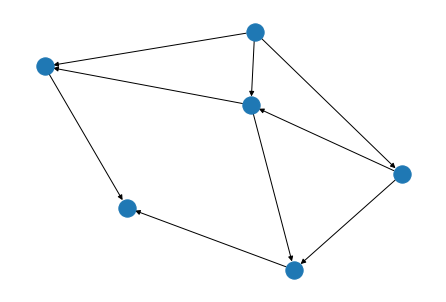

In [12]:
import matplotlib.pyplot as plt 
nx.draw( G) 
plt.show() 

# 5) Study the function melt and apply in the data.

## Melt

The melt function is useful to massage a DataFrame into a format where one or more columns are identified as variables (id_vars), while all other columns, considered measured variables (value_vars), leaving just two non-identifier columns, ‘variable’ and ‘value’.

## Reference
Pandas Documentation: https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [13]:
#At first, let's have a look in the raw dataframe
dfct

,Order,Product,Country
0,1,TV,Brazil
1,2,TV,Brazil
2,3,Computer,Brazil
3,4,TV,Brazil
4,5,TV,Bolivia
5,6,Computer,Bolivia
6,7,Computer,Bolivia
7,8,Computer,Bolivia
8,9,TV,Bolivia
9,10,Radio,Bolivia


We can see that in this dataframe it has different products and different countries. Let's have a look how it is going to be if we apply the function melt.

In [14]:
dfct.melt(id_vars=['Country'])

,Country,variable,value
0,Brazil,Order,1
1,Brazil,Order,2
2,Brazil,Order,3
3,Brazil,Order,4
4,Bolivia,Order,5
5,Bolivia,Order,6
6,Bolivia,Order,7
7,Bolivia,Order,8
8,Bolivia,Order,9
9,Bolivia,Order,10


In [15]:
dfct.melt(id_vars=['Country'], value_vars=['Product']) #We can also fiter to see only one specific variable of the dataframe (in our case, only the products)

,Country,variable,value
0,Brazil,Product,TV
1,Brazil,Product,TV
2,Brazil,Product,Computer
3,Brazil,Product,TV
4,Bolivia,Product,TV
5,Bolivia,Product,Computer
6,Bolivia,Product,Computer
7,Bolivia,Product,Computer
8,Bolivia,Product,TV
9,Bolivia,Product,Radio


In [16]:
dfct.melt(id_vars=['Country'], value_vars=['Product'], var_name='variavel', value_name='valor')  #We can also change the name of the value and variable column.

,Country,variavel,valor
0,Brazil,Product,TV
1,Brazil,Product,TV
2,Brazil,Product,Computer
3,Brazil,Product,TV
4,Bolivia,Product,TV
5,Bolivia,Product,Computer
6,Bolivia,Product,Computer
7,Bolivia,Product,Computer
8,Bolivia,Product,TV
9,Bolivia,Product,Radio


# 6) Use the transpose function in SQL to achieve the same result as the Pandas transpose.

### At first, let's turn this dataframe into a SQL table, so at first we're going to convert it into an excell file and then import to the MySQL

In [17]:
df.to_excel('prices.xlsx')

Right now we're going to import it into a sql schema.

Into the mysql program, we select one of the schemas we have, then we'd clicked in tables section and after this we had clicked with the right bottom of the mouse and clicked in 'create new table'. It openned a new window in te sql to we create the table and name the columns. We'd named the table as 'fact_checker' and named the columns with the same names of the columns in the dataframe then created applied to create the table.

After this, we clicked with the right bottom in the new table we had created and choose the option "table data import wizard" to import the file to the mysql and after this, our table was filled with data.

After that I used the following querry in Mysql:

SELECT *

FROM (SELECT Variable as Variable,

Title as Title,

'Values' as 'Values' 

FROM puthon_activities.prices

group by Title, Variable) em_linha, PIVOT (SUM(valor) for Variable in (['Price'],['Rating']) em_colunas

ORDER BY 1

Which returned to me:



| variables | Price | Rating | Price | Rating | Price | ... | Price | Rating |
|--- |--- |--- |--- |--- |--- |--- |--- |--- |
| Title| Jujutsu Kaisen 0 | Jujutsu Kaisen 0 | The Two Lions | The Two Lions |Kaiju No. 8, Vol. 1 (1) | ... | Ero Ninja Scrolls Vol. 2 |Ero Ninja Scrolls Vol. 2 | 
| Values | 8.99 | 4.8 out of 5 stars | 12.59 | 4.7 out of 5 stars |9.99 | ...| 13.99 |    | 
